<a href="https://colab.research.google.com/github/aminbuet/Deep_Learning_Projects/blob/master/classification_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
import tensorflow_datasets as tfds

tfds.list_builders()

['abstract_reasoning',
 'aeslc',
 'aflw2k3d',
 'amazon_us_reviews',
 'arc',
 'bair_robot_pushing_small',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'cos_e',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 'dsprites',
 'dtd',
 'duke_ultrasound',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'emnist',
 'eraser_multi_rc',
 'esnli',
 'eurosat',
 'fashion_mnist',
 'flic',
 'flores',
 'food101',
 'gap',
 'gigaword',
 'glue',
 'gr

In [36]:
import tensorflow as tf

# load minst hand-writting dataset
mnist_train = tfds.load(name="mnist", split="train")
assert isinstance(mnist_train, tf.data.Dataset)
print(mnist_train)

<DatasetV1Adapter shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>


In [37]:
#Data version
mnist = tfds.load("mnist:1.*.*")

Label: 4


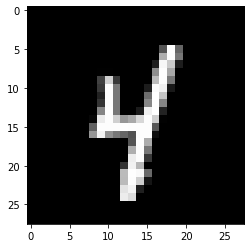

In [38]:
# feature is mapped intensor value (image + label)
#c
for mnist_example in mnist_train.take(1):
  image, label = mnist_example['image'], mnist_example['label']

  plt.imshow(image.numpy()[:,:,0].astype(np.float32), cmap=plt.get_cmap("gray"))
  print("Label: %d" % label.numpy())

In [0]:
# Do same withe builder

mnist_builder = tfds.builder("mnist")

In [40]:
# check info
mnist_builder.info

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.0,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

In [41]:
test = mnist_builder.info
print(test.features)
print(test.features["label"].num_classes)
print(test.features["label"].names)

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})
10
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [0]:
# Load Straight-forward
mnist_test, info = tfds.load("mnist", split="test", with_info=True)


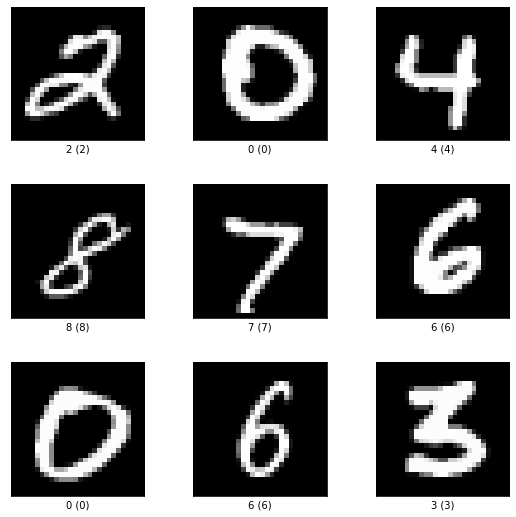

In [43]:
fig = tfds.show_examples(info, mnist_test)

MNIST FASHION Dataset

In [0]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [45]:
print(metadata)

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.0,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [47]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [0]:
# Normalize
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

Convalutaional Model

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
# Train model with batch size
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [52]:
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.3981 - accuracy: 0.8563
Epoch 2/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.2659 - accuracy: 0.9022
Epoch 3/10
1875/1875 [==============================] - 100s 54ms/step - loss: 0.2129 - accuracy: 0.9218
Epoch 4/10
1875/1875 [==============================] - 93s 50ms/step - loss: 0.1834 - accuracy: 0.9322
Epoch 5/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.1545 - accuracy: 0.9434
Epoch 6/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.1313 - accuracy: 0.9517
Epoch 7/10
1875/1875 [==============================] - 101s 54ms/step - loss: 0.1142 - accuracy: 0.9574
Epoch 8/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0945 - accuracy: 0.9647
Epoch 9/10
1875/1875 [==============================] - 102s 54ms/step - loss: 0.0804 - accuracy: 0.9703
Epoch 10/10
1875/1875 [==============================] - 10

In [56]:
# Accuracy of test set
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/BATCH_SIZE))

print('Accuray of the test dataset: ', test_accuracy)

313/313 [==============================] - 6s 18ms/step - loss: 0.3408 - accuracy: 0.9172
Accuray of the test dataset:  0.9172000288963318


some prediction from model

In [0]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  prediction = model.predict(test_images)

In [58]:
prediction.shape

(32, 10)

In [59]:
#check
prediction[0]

array([4.95242146e-11, 6.67005405e-13, 1.08885826e-04, 1.11127224e-14,
       9.97643411e-01, 1.51022164e-11, 2.24765064e-03, 1.17898841e-13,
       5.72556271e-13, 5.37444145e-10], dtype=float32)

Output come into 10 number array as because 10 cateegory corresponding confidence level. So, max value is our prediction.

In [60]:
np.argmax(prediction[0])

4

In [62]:
# see the label
test_labels[0]

4

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               401536    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

*Save* model inhard drive i.e. cloud

In [64]:
# file name taken from timestamp
import time 
t = time.time()

out_path = './{}.h5'.format(int(t))
print(out_path)

model.save(out_path)

./1587215087.h5


In [65]:
# check destination
!ls


1587215087.h5  sample_data


In [68]:
# load saved model
from tensorflow import  keras

new_model = keras.models.load_model('1587215087.h5')

new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               401536    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               